In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re

In [2]:
df = pd.read_csv('data_assignment.csv')

In [3]:
# The "Date" column is represented in a format that contained both date and time information. However, the time is not correct and should be removed. (1 point)
df['Date'] = df["Date"].replace(to_replace=r'T.*',value='',regex=True)
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


In [4]:
# Change type of “Id” column to numeric and change type of “Date” column to DateTime. (1 point)
df['Date'] = pd.to_datetime(df['Date'])
df['Id'] =  pd.to_numeric(df['Id'])

In [5]:
df.dtypes

Id                            int64
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
dtype: object

In [6]:
# Are there any duplicate data in the dataset? Provide the way you find them and your solution to fix it.
df[df.duplicated()].shape[0]

# There is no duplicate in the dataset
# Solution to fix duplication 
df.drop_duplicates(inplace=True)

In [7]:
# Check missing data and visualize them in a corresponding chart.** (1.5 point)

# Check missing data
df.isnull().sum(axis = 0)



Id                       0
Title                    0
Company               5762
Date                     0
Location                 0
Area                 56503
Classification           0
SubClassification        0
Requirement              0
FullDescription       3282
LowestSalary             0
HighestSalary            0
JobType               3233
dtype: int64

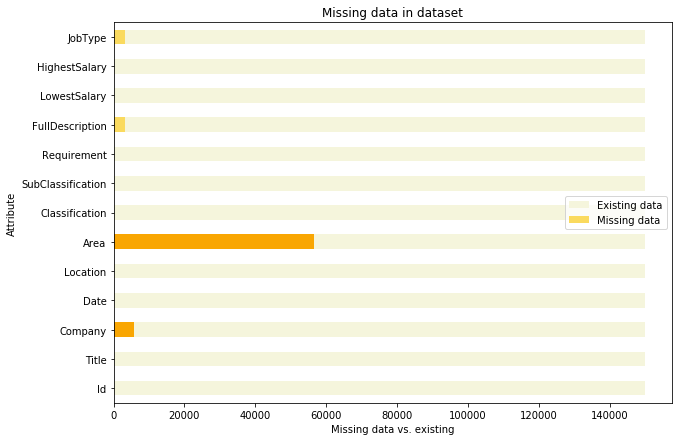

In [13]:
# Visualise missing data using Plot

colors1 = ["#F5F5DC"]
fig, ax = plt.subplots(figsize=(10,7))  
ax.set_title("Missing data in dataset");
ax.set_xlabel("Missing data vs. existing")

# Plot 1 Existing data 
df_2 = df.notnull().count(axis = 0)
df_2 = df_2.reset_index()
df_2.columns=['Attribute1', 'Existing data']
df_2.plot.barh(x='Attribute1',y='Existing data', ax=ax, stacked=True, color=colors1)

# Plot 2 Missing data 
colors2 = ["#FADA5E", "#FFD300","#F9A602"]
df_1 = df.isnull().sum(axis = 0)
df_1 = df_1.reset_index()
df_1.columns=['Attribute', 'Missing data']
df_1.plot.barh(x='Attribute',y='Missing data', ax=ax, stacked=True, color=colors2)


                   Missing data  Existing data
Attribute                                     
Id                            0         149999
Title                         0         149999
Company                    5762         144237
Date                          0         149999
Location                      0         149999
Area                      56503          93496
Classification                0         149999
SubClassification             0         149999
Requirement                   0         149999
FullDescription            3282         146717
LowestSalary                  0         149999
HighestSalary                 0         149999
JobType                    3233         146766


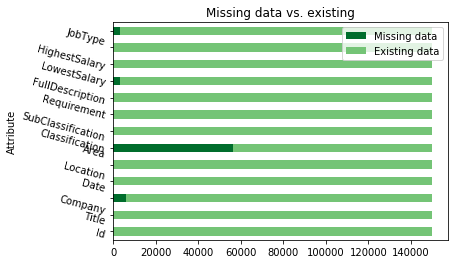

In [9]:
colors = ["#006D2C","#74C476"]
df_1 = df.isnull().sum(axis = 0)
df_1 = df_1.reset_index()
df_1.columns=['Attribute', 'Missing data']


df_2 = df.notnull().sum(axis = 0)
df_2 = df_2.reset_index()
df_2.columns=['Attribute1', 'Existing data']

# Build the dataframe

dataFrame = pd.concat([df_1,df_2], axis=1, sort=False)
dataFrame = dataFrame[['Attribute','Missing data','Existing data']] 


# Draw a stacked horizontal bar chart
dataFrame.set_index('Attribute',inplace = True)
print(dataFrame)
dataFrame.plot.barh(stacked=True, rot=-15, color=colors, title="Missing data vs. existing");




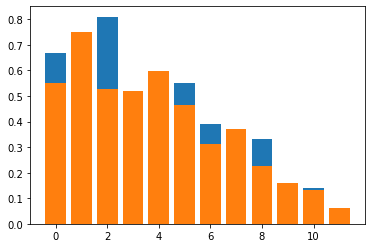

In [10]:
import numpy as np

import matplotlib.pyplot as plt

n = 12

X = np.arange(n)

Y1 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)

Y2 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
p1 = plt.bar(X, Y1)

p2 = plt.bar(X, Y2)

